In [1]:
import pandas as pd
import numpy as np
from CFA_function import ClusteredFactorAnalysis
from sklearn.preprocessing import StandardScaler
import sys
sys.path.insert(0, './utils')
from visualization import Plotter
from evaluation import Evaluation
from factor_analysis import FactorModel
from statistical_tools import multivariate_likelihood


In [2]:
# Load data
sample_data=pd.read_csv('./sample_data/Station_Attributes.csv')
sp=sample_data[['Station_lon','Station_lat']].to_numpy()
data_witout_sp=sample_data.drop(columns=['Station_lon','Station_lat']).select_dtypes(include=['number'])

Parallel analysis suggests that the number of factors =  6


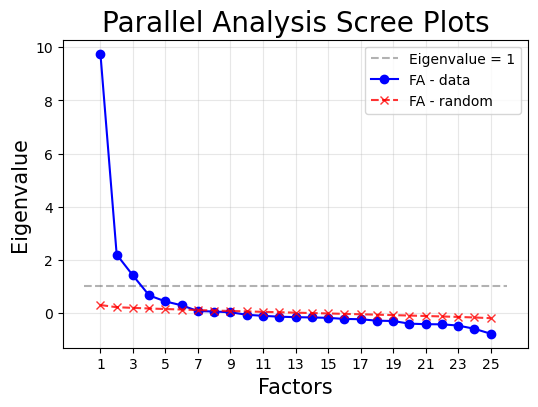

In [3]:
#Do parallel analysis
FactorModel(data_witout_sp).ParallelAnalysis()

In [9]:
# fitting the model
cfa= ClusteredFactorAnalysis(data_witout_sp,sp=sp, group_size = 4, factor_number = 6, group_type = 'kmeans', maxitr = 50, phi=1, matrix_file = True, file_name='topo_matrix.npy',random_state=15)
re=cfa.fit()  
Plotter_=Plotter(data_witout_sp,re,sp)
Evaluation_=Evaluation(data_witout_sp,re)

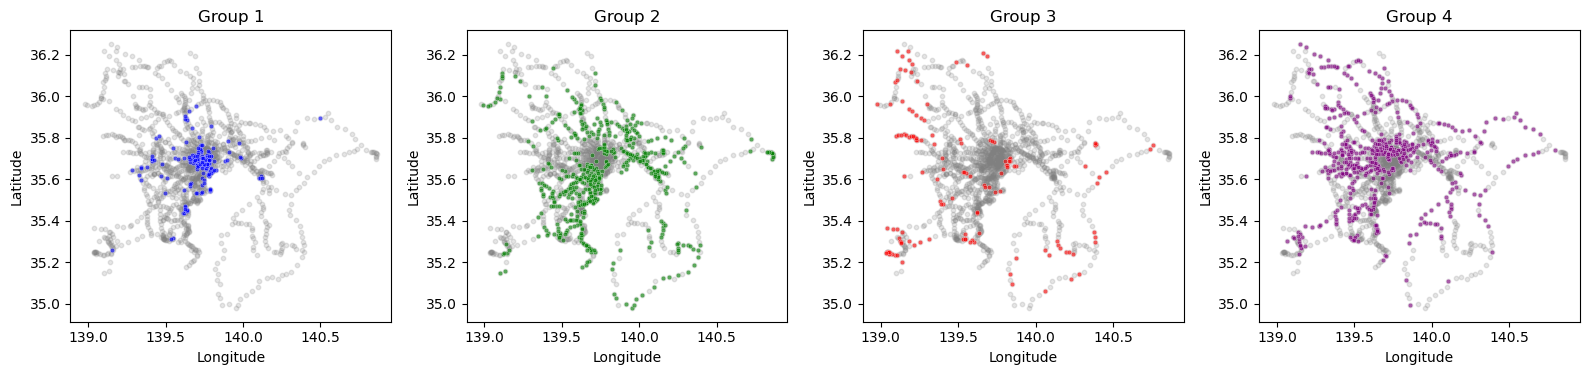

In [6]:
Plotter_.each_group_location('')

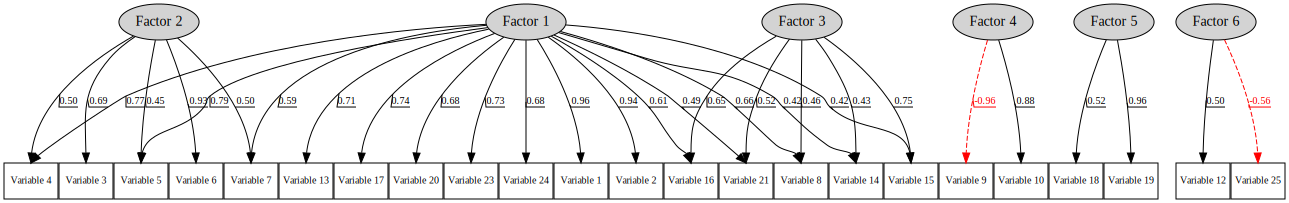

In [7]:
Plotter_.plot_diagram(3,cut_off=0.4)

In [14]:
#conduct EFA on the data

scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data_witout_sp), columns=data_witout_sp.columns)
cov_,_,_,_,_,_=FactorModel(scaled_df).fit_fa(6)

X = scaled_df.to_numpy()
mean_vector = np.zeros(X.shape[1])        
loglike=[]
for i in range(len(X)):
    loglike.append(multivariate_likelihood(X[i], mean_vector, cov_))
num_feature = X.shape[1]

num_params = num_feature  * 6 + num_feature 
standard_aic = (2 * num_params - 2 * sum(loglike))
standard_bic = (np.log(len(X)) * num_params - 2 * sum(loglike))

print("AIC of EFA: ",str(int(standard_aic)),"BIC of EFA: ",str(int(standard_bic)))
print("AIC of SCFA: ",str(int(Evaluation_.calculate_AIC())),"BIC of SCFA: ",str(int(Evaluation_.calculate_BIC())))

AIC of EFA:  75462 BIC of EFA:  76395


AIC of SCFA:  66508 BIC of SCFA:  70243
